### Random Forest
##### Random Forest is used for both classification and regression models.<br>
##### This algorithm uses decision trees, but does not require hyperparameter tuning. <br>
###### The data used is about...pumpkin seeds. I got this off Kaggle. Apparently pumpkin seeds are a popular snack food in Turkey. Does Mars have this level of analysis with its Peanut M&Ms?

In [1]:
#I use scikit-learn for ML. PyTorch is more powerful, but I'm still at the beginning level
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Pandas and Numpy are used for data processing; sklearn and scipy are for modelling

import pandas as pd
import numpy as np
import random as rd

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [3]:
#Make sure you have your file uploaded to your notebook
PK = pd.read_csv("Pumpkin_Seeds_Dataset.csv")

In [4]:
#The next few commands are just to help you get an idea of what the data looks like, so you don't need to scroll through endless columns and rows
PK.shape

(2500, 13)

In [5]:
PK.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness', 'Class'],
      dtype='object')

In [6]:
#Note that our dependent variable is one of 2 words (two types of seed). I took the easy way out, but creating a new binary column will allow more analysis later
PK.info

<bound method DataFrame.info of        Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0     56276    888.242           326.1485           220.2388        56831   
1     76631   1068.146           417.1932           234.2289        77280   
2     71623   1082.987           435.8328           211.0457        72663   
3     66458    992.051           381.5638           222.5322        67118   
4     66107    998.146           383.8883           220.4545        67117   
...     ...        ...                ...                ...          ...   
2495  79637   1224.710           533.1513           190.4367        80381   
2496  69647   1084.318           462.9416           191.8210        70216   
2497  87994   1210.314           507.2200           222.1872        88702   
2498  80011   1182.947           501.9065           204.7531        80902   
2499  84934   1159.933           462.8951           234.5597        85781   

      Equiv_Diameter  Eccentricity  Solidit

In [7]:
#We split the data with 80 percent for training, 20 percent for testing
#The code below says "Use 'Class' as the y variable, everything else is X"

X = PK.drop('Class', axis=1)
y = PK['Class']

X_train, X_test, y_train, Y_test = train_test_split(X, y, test_size=0.2)


In [8]:
#Choose the model and fit it

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [9]:
#Run the model to make a prediction
y_pred = rf.predict(X_test)

In [10]:
#The accuracy turns out to be a decent number. Hyperparameter tuning isn't necessary, but if we have the time and resources...
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.872


In [11]:
#Choose 2 parameters. Increasing hyperameters improves performance but also takes more time and resources. It can also lead to over/underfitting.
#Altering n_estimators changes the number of decision trees in the forest.
#Altering max_depth changes the size of each tree
#Scikit-learn has a "random search" command, so we don't have to guess!

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fbdecd5b160>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fbe0a862470>})

In [12]:
#Tell python you want a "best model", to distinguish from the others it ran via the hyperparameter search
best_rf = rand_search.best_estimator_

print('Best Hyperparameters:', rand_search.best_params_)

Best Hyperparameters: {'max_depth': 12, 'n_estimators': 159}


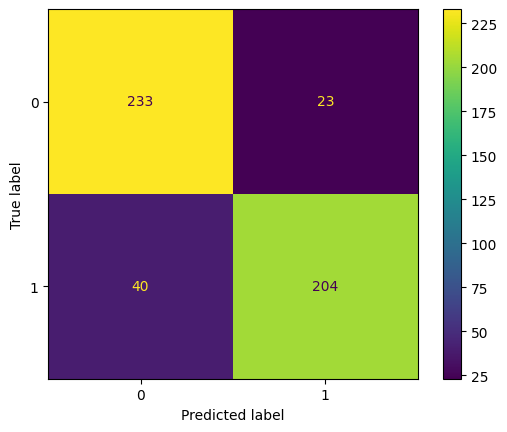

In [13]:
#Make predictions using the best model, then create confusion matrix. No one wants Type I or Type II errors.
y_pred = best_rf.predict(X_test)

cm = confusion_matrix(Y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [14]:
#Pretty good! Let's try some other measures: accuracy again, as well as recall

recall = recall_score(Y_test, y_pred, average="binary", pos_label="Çerçevelik")

print("Accuracy:", accuracy)
print("Recall:", recall)

Accuracy: 0.872
Recall: 0.91015625


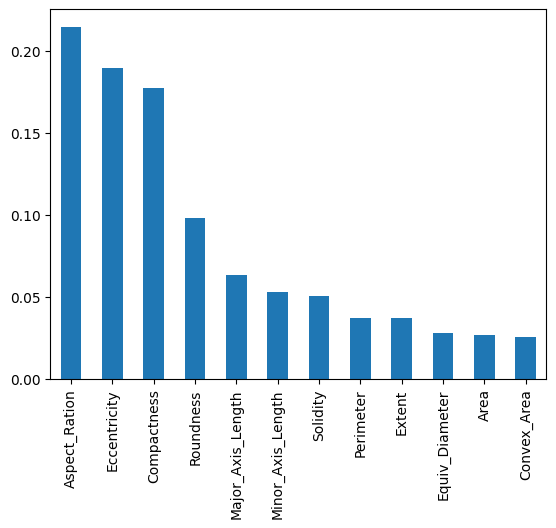

In [15]:
#A feature importances chart shows what factors have the most influence in determining the y value
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_importances.plot.bar();